In [1]:
from learningAgentsBase import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from neuralNetwork import NNBase
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1
adversaryProbs[1]=0
adversaryProbs[8]=0
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 3, adversaryProbs=adversaryProbs, advHistoryNum=0)
adversaryProbs

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
game.reset()

(tensor([  0.0000, 200.0000, 128.5000]), 0, False)

In [4]:
game.adversaryChoosePrice()

135.5

In [5]:
neuralNet=NNBase(num_input=3+game.advHistoryNum, lr=0.0001,num_actions=4)
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=1000_000, discountFactor =0.9)

--------------------------------------------------
0   adversary:  AdversaryModes.myopic
  actions:  tensor([1, 1, 1])
loss=  tensor(-0., grad_fn=<DivBackward0>)   , return=  16061.75
probs of actions:  tensor([0.2575, 0.2566, 0.2574], grad_fn=<ExpBackward0>)
shouldBreak: False
baseDiscReturns/1000= tensor([0., 0., 0.])
meanStageValue=  tensor([14467.2676, 10395.5742,  5549.2500])
--------------------------------------------------
1000   adversary:  AdversaryModes.myopic
  actions:  tensor([3, 3, 3])
loss=  tensor(0.0039, grad_fn=<DivBackward0>)   , return=  16223.8125
probs of actions:  tensor([0.9221, 0.9263, 0.9314], grad_fn=<ExpBackward0>)
shouldBreak: False
baseDiscReturns/1000= tensor([0.0517, 0.0608, 0.0400])
meanStageValue=  tensor([14551.2285, 10494.4229,  5613.5835])
--------------------------------------------------
2000   adversary:  AdversaryModes.myopic
  actions:  tensor([3, 3, 3])
loss=  tensor(0.0003, grad_fn=<DivBackward0>)   , return=  16223.8125
probs of actions:  t

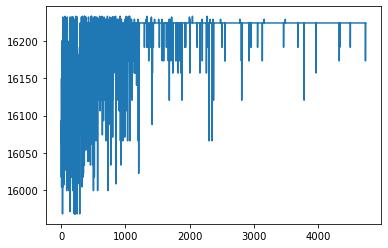

In [6]:
algorithm.solver(print_step=1000)

In [7]:
advModeNames=""
for i in range(len(adversaryProbs)):
    if adversaryProbs[i]!=0:
        tmp="{:.1f}".format(adversaryProbs[i])
        advModeNames+=f"{(AdversaryModes(i)).name}-{tmp}-"
    
name=f"ep {algorithm.numberEpisodes}, {advModeNames}, {game.advHistoryNum} hist, {neuralNet.lr} lr"
neuralNet.save(name=name)

In [10]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns[0],columns=['entry'])
loss=pd.DataFrame(algorithm.loss[0],columns=['entry'])

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
loss.plot()

In [ ]:
demandPotential.plot()
demandPotential

In [ ]:
profits.sum(axis=0)

In [ ]:
profits.plot()
profits


In [ ]:
prices.plot()
prices

In [ ]:
learning.plot()

In [ ]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [ ]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

In [ ]:
plt.plot(avg_learning)
plt.show()